# Sentiment Analysis for Amazon Movie Reviews Dataset

15.05.2020    
Anılcan Atik

  **The Amazon Movie Dataset**  contains product reviews and metadata from Amazon, including 142.8 million reviews spanning May 1996 - July 2014.     
     
  This dataset includes reviews (**ratings, text, helpfulness votes**) and product metadata (**descriptions, category information, price, brand, and image features**).  
  
{  
  **"reviewerID"**: "A2SUAM1J3GNN3B",  
  **"asin":** "0000013714",  
  **"reviewerName":** "J. McDonald",  
  **"helpful":** [2, 3],  
  **"reviewText":** "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",  
  **"overall":** 5.0,  
  **"summary":** "Heavenly Highway Hymns",  
  **"unixReviewTime":** 1252800000,  
  **"reviewTime":** "09 13, 2009"  
}  
  
  
  #### UCSB [webpage](http://jmcauley.ucsd.edu/data/amazon/) can be usefull for more information about dataset.
    

### Converting .json into .csv format:

In [1]:
import csv
import json
#download link = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Movies_and_TV_5.json.gz"
input_file = "C:/Users/Joahn/Desktop/ML Intro Term Project/Movies_and_TV_5.json"
input_json = open(input_file, "r", encoding="utf-8")

output_file = "C:/Users/Joahn/Desktop/ML Intro Term Project/Movies_and_TV_5.csv"
with open(output_file, "w", encoding="utf-8") as output_csv:
    csv_writer = csv.writer(output_csv)
    flag = 0
    for line in input_json.readlines():
        dic = json.loads(line)
        # writing headline in the beginning
        if flag == 0:
            csv_writer.writerow(dic)
            flag = 1
        csv_writer.writerow(dic.values())

print("Done")

Done


### Eliminating the neutral review rates:

Since rating is 1 to 5; 1-2 ratings indicate negative response whereas 5-4 ratings indicate positive response.  
Thus we aim to eliminate neutral rating 3, and re-label positive scores as +1, negative scores as -1.

In [77]:
import pandas as pd
import string

input_data = pd.read_csv("C:/Users/Joahn/Desktop/ML Intro Term Project/Movies_and_TV_5.csv")
input_data['overall'] = input_data['overall'].astype(object) # fix datatype error
input_data['reviewText'] = input_data['reviewText'].astype(object) # fix datatype error

In [78]:
input_data.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4.0,good version of a classic,1203984000,"02 26, 2008"
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3.0,Good but not as moving,1388361600,"12 30, 2013"
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3.0,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"


In [79]:
input_data.shape

(1697533, 9)

In [80]:
dataset = {"reviewText": input_data["reviewText"], "overall": input_data["overall"]  }
dataset = pd.DataFrame(data = dataset)
dataset = dataset.dropna()

In [81]:
dataset.head(3)

,reviewText,overall
0,This is a charming version of the classic Dick...,4.0
1,It was good but not as emotionally moving as t...,3.0
2,"Don't get me wrong, Winkler is a wonderful cha...",3.0


In [82]:
dataset.shape

(1697472, 2)

### Introducing Positive and Negative Labels:

Eliminating the **neutral reviews** of **"3",**   
**positive label value is +1** and it includes **4 and 5 overall ratings;**   
while **negative label value is -1** and in includes **1 and 2 overal ratings.**

In [85]:
dataset = dataset[dataset["overall"] != "3.0"] # need datatype=object
dataset["label"] = dataset["overall"].apply(lambda rating : +1 if str(rating) > '3' else -1)

In [86]:
dataset.head(3)

,reviewText,overall,label
0,This is a charming version of the classic Dick...,4.0,1
3,Henry Winkler is very good in this twist on th...,5.0,1
4,This is one of the best Scrooge movies out. H...,4.0,1


In [87]:
dataset.shape

(1496953, 3)

In [88]:
dataset.count()

reviewText    1496953
overall       1496953
label         1496953
dtype: int64

In [89]:
print("Number of positive reviews are {}, while number of negative reviews are {} in the dataset".format((dataset.label == 1).sum(),(dataset.label == -1).sum()))

Number of positive reviews are 1291214, while number of negative reviews are 205739 in the dataset


* There is a way less negative reviews compared to positive reviews in our data. That might create a problematic bias towards positive reviews.   
    
* **I need to investigate further whether I should be using balanced learning model or choose the imbalanced learning model.**     



* **dataset_i = imbalanced**   
* **dataset_b = balanced**

* Due to the time and resource constraints I will be sampling dataset, and use small chunk of reviews in my model.

### Dataset_i:

In [92]:
dataset_i = dataset.sample(frac = 0.03, replace = False, random_state=42)

In [93]:
dataset_i.count()

reviewText    44909
overall       44909
label         44909
dtype: int64

In [94]:
print("Number of positive reviews are {}, while number of negative reviews are {} in the dataset.".format((dataset_i.label == 1).sum(),(dataset_i.label == -1).sum()))

Number of positive reviews are 38819, while number of negative reviews are 6090 in the dataset.


### Dataset_b:

* I am planning to include **200,000 negative and 200,000 positive reviews** in this dataset.

In [101]:
dataset_neg = dataset[dataset["label"] == -1]
dataset_pos= dataset[dataset["label"] == +1]
dataset_neg = dataset_neg.sample(frac = 0.1215, replace = False, random_state = 42)
dataset_pos = dataset_pos.sample(frac= 0.01936, replace = False, random_state = 42)
print("dataset_neg: {}, dataset_pos: {}.".format(dataset_neg.count(),dataset_pos.count()))
dataset_b = pd.concat([dataset_neg,dataset_pos])
print("dataset_b: {}".format(dataset_b.count()))

dataset_neg: reviewText    24997
overall       24997
label         24997
dtype: int64, dataset_pos: reviewText    24998
overall       24998
label         24998
dtype: int64.
dataset_b: reviewText    49995
overall       49995
label         49995
dtype: int64


In [104]:
dataset_b.head()

,reviewText,overall,label
715454,I was fortunate enough to watch this with John...,2.0,-1
201768,"Good movie, bad format. If you people would st...",1.0,-1
62207,"Awful, horribly stupid movie. One of THE most ...",1.0,-1
1658239,"I SHOULD NOT HAVE BOUGHT IT, I DID SO BECAUSE...",1.0,-1
570367,"I have always been a fan of Charlie's Angels, ...",2.0,-1


### Data Cleaning Process:

* In this data cleaning process, 
I used **nltk wordnet library**, and found bunch of cleaning functions, that fits my pre-processing goals.

In [105]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data_i
dataset_i["review_clean"] = dataset_i["reviewText"].apply(lambda x: clean_text(x))
# clean text data_b
dataset_b["review_clean"] = dataset_b["reviewText"].apply(lambda x: clean_text(x))

In [106]:
dataset_i.head()

,reviewText,overall,label,review_clean
181173,"The movie ""Scream 2"" is basically just like ""S...",1.0,-1,movie scream basically like scream neither mov...
1459925,"Good Movie, I liked it, Great FlimI like the d...",4.0,1,good movie like great flimi like depictation c...
56386,Oliver Stone gives Cruise his best role as Ron...,5.0,1,oliver stone give cruise best role ron kovic b...
1236023,It was difficult making this tv series into a ...,4.0,1,difficult make tv series movie series primaril...
272125,In 1946 John Wayne (1907-79) was a big star as...,2.0,-1,john wayne big star result film stagecoach dar...


In [107]:
dataset_b.head()

,reviewText,overall,label,review_clean
715454,I was fortunate enough to watch this with John...,2.0,-1,fortunate enough watch john scott shepherd aut...
201768,"Good movie, bad format. If you people would st...",1.0,-1,good movie bad format people would stop pay ju...
62207,"Awful, horribly stupid movie. One of THE most ...",1.0,-1,awful horribly stupid movie one overrate movie...
1658239,"I SHOULD NOT HAVE BOUGHT IT, I DID SO BECAUSE...",1.0,-1,buy mel gibson suppose stop watch min never see
570367,"I have always been a fan of Charlie's Angels, ...",2.0,-1,always fan charlie's angel absolutely adore dr...


### WordCloud for dataset_b

#### Most Used Words in Negative Reviews: 

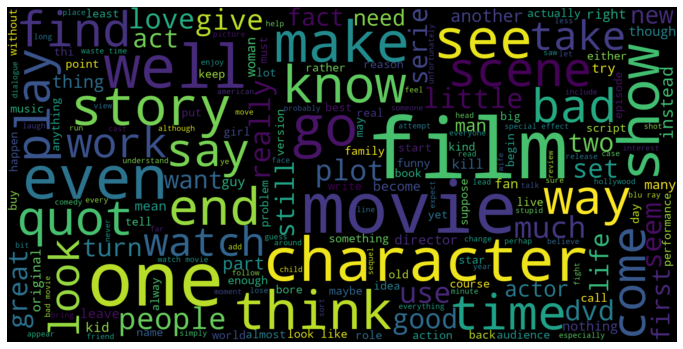

In [108]:
from matplotlib import pyplot as plt
neg_reviews = dataset_b[dataset_b.label == -1]
neg_string = []
for t in neg_reviews.review_clean:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Most Used Words in Negative Reviews: 

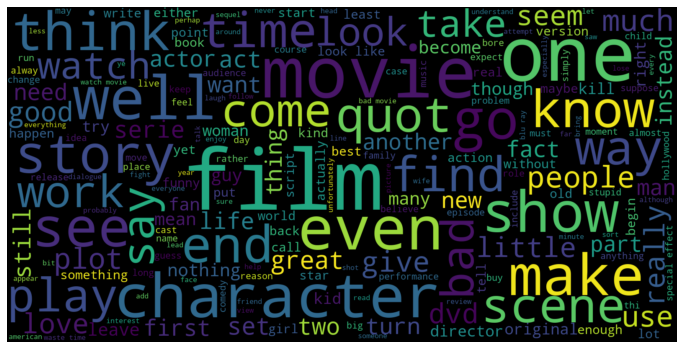

In [109]:
from matplotlib import pyplot as plt
pos_reviews = dataset_b[dataset_b.label == +1]
pos_string = []
for t in pos_reviews.review_clean:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Splitting Dataset:

In [110]:
from sklearn.model_selection import train_test_split

Xb = pd.DataFrame(dataset_b, columns = ["reviewText"])
yb = pd.DataFrame(dataset_b, columns = ["label"])

train_Xb, test_Xb, train_yb, test_yb = train_test_split(Xb, yb,test_size=0.30)

In [111]:
from sklearn.model_selection import train_test_split

Xi = pd.DataFrame(dataset_i, columns = ["reviewText"])
yi = pd.DataFrame(dataset_i, columns = ["label"])

train_Xi, test_Xi, train_yi, test_yi = train_test_split(Xi, yi,test_size=0.30)

In [112]:
train_Xb.head(3)

,reviewText
352952,"(...), you've heard from other reviewers, this..."
130105,why ANYONE would want to buy a full screen ver...
1483283,I saw this movie in 3-D when it came out in th...


In [113]:
train_Xi.head(3)

,reviewText
1234622,"an story that shows courage, love and understa..."
794404,An excellent DVD for someone to begin practici...
144855,The original Mildred Pierce is truly a classic...


In [114]:

print("Shape of the data data : train_Xb={} train_yb={} test_Xb={} test_yb={}".format(str(train_Xb.shape),str(train_yb.shape),str(test_Xb.shape),str(test_yb.shape)))

Shape of the data data : train_Xb=(34996, 1) train_yb=(34996, 1) test_Xb=(14999, 1) test_yb=(14999, 1)


In [115]:

print("Shape of the data data : train_Xi={} train_yi={} test_Xi={} test_yi={}".format(str(train_Xi.shape),str(train_yi.shape),str(test_Xi.shape),str(test_yi.shape)))

Shape of the data data : train_Xi=(31436, 1) train_yi=(31436, 1) test_Xi=(13473, 1) test_yi=(13473, 1)


### Vectorization:

* Features in machine learning is basically numerical attributes from which anyone can perform some mathematical operation such as matrix factorisation, dot product etc.    
* In this case, to convert string features into numerical features, we need to use vectorization method.

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_vectorb = vectorizer.fit_transform(train_Xb["reviewText"])
test_vectorb = vectorizer.transform(test_Xb["reviewText"])
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))
print("X_train:\n{}".format(repr(train_Xb)))
print("X_test: \n{}".format(repr(test_Xb)))
feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 89378
X_train:
                                                reviewText
352952   (...), you've heard from other reviewers, this...
130105   why ANYONE would want to buy a full screen ver...
1483283  I saw this movie in 3-D when it came out in th...
591592   Mandy Moore is sweet but sharp. She is thought...
775373   Listen up movie goers this movie has to be the...
...                                                    ...
641531   I've always loved Kate Jackson and I really en...
1411983  Thoroughly  enjoyable and relaxilng to watch! ...
1296347  This is a wonderful show with everything I loo...
1562887  I must admit I do love the first better but th...
607255   ...reveals Jerry Seinfeld as a serious and gra...

[34996 rows x 1 columns]
X_test: 
                                                reviewText
407620   This Jane Eyre movie is my favorite of all, be...
1476511  I knew better and I said so in my review of "L...
1296288  Carefully crafted depiction of life in 

* Count vectorizer has extracted **89,378** words out of the corpus from balanced dataset.

In [121]:
train_vectori = vectorizer.fit_transform(train_Xi["reviewText"])
test_vectori = vectorizer.transform(test_Xi["reviewText"])
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))
print("X_train:\n{}".format(repr(train_Xi)))
print("X_test: \n{}".format(repr(test_Xi)))
feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 84648
X_train:
                                                reviewText
1234622  an story that shows courage, love and understa...
794404   An excellent DVD for someone to begin practici...
144855   The original Mildred Pierce is truly a classic...
141700   I remember when I first saw this movie. WOW! T...
21341    If you enjoy fly fishing, the outdoors, and re...
...                                                    ...
252021   Recently, I decided to rent all of Cameron Cro...
773769   Justin will hold you captive, you will just lo...
496152   Love this movie.  A must for any Roy Rogers fa...
424605   I am collecting all of Elvis's movies on DVD. ...
960632   Way to go Reese, this movie was like a breath ...

[31436 rows x 1 columns]
X_test: 
                                                reviewText
855068   This was actually a very touching story. The m...
1413961  Very enjoyable post alien invasion program. A ...
549196   this dvd of zombie doom also features a

* Count vectorizer has extracted **84648** words out of the corpus from the imbalanced dataset.

### Training Model:

* We will use **LogisticRegression** for model development as for high dimensional sparse data like ours. 
   
* **Grid Search:** for paramater tuning of LogisticRegression. We want to determine what value of coefficeint ‘C’ provides better accuracy.

#### Balanced Model Training:

In [131]:
from sklearn.linear_model import LogisticRegression

clr = LogisticRegression()
clr.fit(train_vectorb, train_yb.values.ravel())
scores = clr.score(test_vectorb, test_yb) # accuracy
pred_yb = clr.predict(test_vectorb)
print(scores)

0.8707913860924061


#### Imbalanced Model Training:

In [133]:
clr.fit(train_vectori, train_yi.values.ravel())
scores = clr.score(test_vectori, test_yi) # accuracy
pred_yi = clr.predict(test_vectori)
print(scores)

0.9204334595116158


### Model Assesment:

#### Variable Name Reminder:

In [129]:
#Xb = pd.DataFrame(dataset_b, columns = ["reviewText"])
#yb = pd.DataFrame(dataset_b, columns = ["label"])

#Balanced:
#train_Xb, test_Xb, train_yb, test_yb = train_test_split(Xb, yb,test_size=0.30)
#pred_yb = clr.predict(test_vectorb)

#Imbalanced:
#train_Xi, test_Xi, train_yi, test_yi = train_test_split(Xi, yi,test_size=0.30)
#pred_yi = clr.predict(test_vectori)

#### Assesment of Balanced Learning Model:

In [132]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(test_yb, pred_yb) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(test_yb, pred_yb) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(test_yb, pred_yb))

Accuracy: 87.08%

F1 Score: 87.37

COnfusion Matrix:
 [[6356 1026]
 [ 912 6705]]


* **6356** predicted negative (-1), and was negative (-1). **True Negative.**    
* **6705** predicted positive (+1), and was positive (+1). **True Positive.**   
* **912** predicted negative (-1), but was positive (+1). **False Negative.**    
* **1026** predicted positive (+1), but was negative (-1). **False Positive.**   

#### Assesment of Imbalanced Learning Model:

In [134]:
print("Accuracy: {:.2f}%".format(accuracy_score(test_yi, pred_yi) * 100))
print("\nF1 Score: {:.2f}".format(f1_score(test_yi, pred_yi) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(test_yi, pred_yi))

Accuracy: 92.04%

F1 Score: 95.46

COnfusion Matrix:
 [[ 1127   678]
 [  394 11274]]


* **1127** predicted negative (-1), and was negative (-1). **True Negative.**     
* **11274** predicted positive (+1), and was positive (+1). **True Positive.**     
* **394** predicted negative (-1), but was positive (+1).    **False Negative.**     
* **678** predicted positive (+1), but was negative (-1).    **False Positive.**    

* The **Imbalanced Learning Model** seems to be the **better predictor** compared to **Balanced Learning Model.**      
* **False Negative** and **False Positive** values are relatively **smaller,** while **F1 score** for Imbalanced Learning Model is higher.

## Conclusion:

In this notebook, we have build a ML Model, that is able to predict whether the sentiment of the message is negative or
positive, by introducing the review texts and their corresponding positive (+1) or negative (-1) label, which has been determined by whether the review rating was 4 or 5; or 1-2. The model was able to predict with accuracy of 92.04%.   
    
    

## References:

* https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-4-count-vectorizer-b3f4944e51b5  
* https://medium.com/datadriveninvestor/sentiment-analysis-on-customer-tweets-nlp-c0eeaeffd19a  
* https://www.learndatasci.com/tutorials/predicting-reddit-news-sentiment-naive-bayes-text-classifiers/  
* https://medium.com/datadriveninvestor/sentiment-analysis-on-customer-tweets-nlp-c0eeaeffd19a   
* https://towardsdatascience.com/yet-another-twitter-sentiment-analysis-part-1-tackling-class-imbalance-4d7a7f717d44   
* https://medium.com/swlh/what-are-your-customers-saying-natural-language-processing-nlp-with-yelp-review-data-65c4ce57287b   
